In [1]:
import torch
print(torch.__version__)

2.4.1+cu124


In [8]:
import torchvision
# 设置训练集
train_ds = torchvision.datasets.MNIST('data', train=True, transform=torchvision.transforms.ToTensor(), download=True)

# 设置测试集
test_ds = torchvision.datasets.MNIST('data', train=False, transform=torchvision.transforms.ToTensor(), download=True)


In [45]:
bs = 64
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=bs,shuffle=True)

test_dl  = torch.utils.data.DataLoader(test_ds)

# 取一个批次查看数据格式
# 数据的shape为：[batch_size, channel, height, weight]
# 其中batch_size为自己设定，channel，height和weight分别是图片的通道数，高度和宽度。
imgs, labels = next(iter(train_dl))
imgs.shape

torch.Size([64, 1, 28, 28])

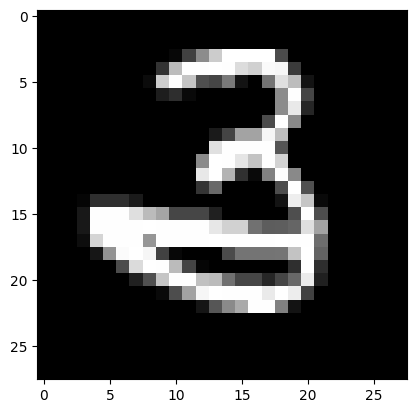

In [57]:
from matplotlib import pyplot
import numpy as np

img = imgs[0,0]
pyplot.imshow(img, cmap="gray")

In [42]:
from torch import nn
import torch.nn.functional as F

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,256)
        self.out = nn.Linear(256,10)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,x):
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        x = self.out(x)
        return x

net = Mnist_NN()
net

Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [44]:
for name,parameter in net.named_parameters():
    print(name,parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[-0.0317, -0.0012, -0.0117,  ...,  0.0142, -0.0302,  0.0328],
        [ 0.0201, -0.0130,  0.0142,  ...,  0.0220, -0.0077,  0.0285],
        [ 0.0337,  0.0302,  0.0205,  ...,  0.0095, -0.0099,  0.0258],
        ...,
        [-0.0293, -0.0150,  0.0075,  ...,  0.0128, -0.0320,  0.0146],
        [ 0.0310,  0.0311, -0.0015,  ..., -0.0024, -0.0337, -0.0142],
        [ 0.0073, -0.0026, -0.0333,  ..., -0.0282, -0.0327,  0.0129]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 0.0148, -0.0289, -0.0308, -0.0088,  0.0342,  0.0053,  0.0099, -0.0134,
         0.0296,  0.0226, -0.0255, -0.0082,  0.0130, -0.0265, -0.0001,  0.0329,
        -0.0068, -0.0232,  0.0241,  0.0156, -0.0011,  0.0233, -0.0322, -0.0051,
        -0.0321, -0.0037, -0.0303,  0.0183, -0.0198, -0.0293,  0.0025,  0.0077,
        -0.0058,  0.0356, -0.0204, -0.0323,  0.0351,  0.0199, -0.0173,  0.0176,
        -0.0269, -0.0346,  0.0073,  0.0031, 

In [66]:
print(next(iter(train_dl))[0].shape,next(iter(train_dl))[1].shape)    

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [ ]:
def


def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(setps):
        model.train()
        for xb,yb in train_dl:
            loss_batch()